## OLS VS Logistic

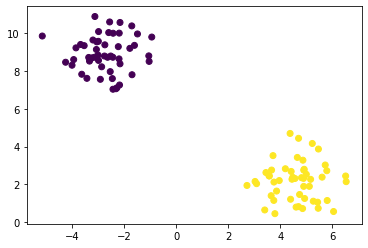

In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=42)
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [2]:
print(y)

[0 1 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0 0 0 0 1 1
 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1
 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0]


In [3]:
# adding an outlier
outlier = np.array([-100000,100])
y_outlier = 0

X2 = np.vstack((outlier, X))
y2 = np.append( y_outlier, y)

In [4]:
print(X2)

[[-1.00000000e+05  1.00000000e+02]
 [-2.98837186e+00  8.82862715e+00]
 [ 5.72293008e+00  3.02697174e+00]
 [-3.05358035e+00  9.12520872e+00]
 [ 5.46193900e+00  3.86996267e+00]
 [ 4.86733877e+00  3.28031244e+00]
 [-2.14780202e+00  1.05523227e+01]
 [ 4.91656964e+00  2.80035293e+00]
 [ 3.08921541e+00  2.04173266e+00]
 [-2.90130578e+00  7.55077118e+00]
 [-3.34841515e+00  8.70507375e+00]
 [-2.44166942e+00  7.58953794e+00]
 [ 3.40292813e+00  6.52713071e-01]
 [-2.97867201e+00  9.55684617e+00]
 [-3.83738367e+00  9.21114736e+00]
 [ 3.95985411e+00  2.20542338e+00]
 [ 3.85662554e+00  1.65110817e+00]
 [ 4.70010905e+00  4.43641180e+00]
 [ 3.56898634e+00  2.45564210e+00]
 [ 4.69808755e+00  8.30199386e-01]
 [-2.41743685e+00  7.02671721e+00]
 [ 4.85397258e+00  7.27430905e-01]
 [ 4.44751787e+00  2.27471703e+00]
 [ 5.43091078e+00  1.06378223e+00]
 [ 5.60325497e+00  2.38595061e+00]
 [ 4.89976163e+00  2.75499256e+00]
 [-9.29984808e-01  9.78172086e+00]
 [ 4.56277713e+00  2.31432166e+00]
 [-1.69667180e+00  1

In [5]:
print(y2)

[0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0 0 0 0 1
 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0]


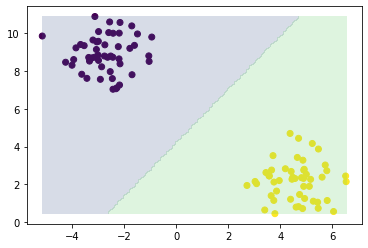

In [6]:
from sklearn.linear_model import LinearRegression

my_regression = LinearRegression()
my_regression.fit(X, y)

x1_min = np.min(X[:,0])
x1_max = np.max(X[:,0])
x2_min = np.min(X[:,1])
x2_max = np.max(X[:,1])

xx1, xx2 = np.meshgrid(np.linspace(x1_min,x1_max, 100), np.linspace(x2_min,x2_max, 100), sparse=False, indexing='ij')
Xprediction = np.vstack((xx1.flatten(), xx2.flatten()))

targets_prediction = my_regression.predict(Xprediction.T)

plt.scatter(X[:,0], X[:,1], c= y)
plt.contourf(xx1,xx2, np.reshape(targets_prediction>0.5, np.shape(xx1)), levels=1, alpha=.2)
plt.show()

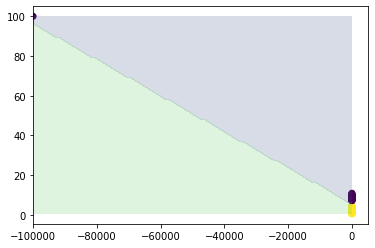

In [7]:
from sklearn.linear_model import LinearRegression
my_regression = LinearRegression()
my_regression.fit(X2, y2)

x1_min = np.min(X2[:,0])
x1_max = np.max(X2[:,0])
x2_min = np.min(X2[:,1])
x2_max = np.max(X2[:,1])

xx1, xx2 = np.meshgrid(np.linspace(x1_min,x1_max, 100), np.linspace(x2_min,x2_max, 100), sparse=False, indexing='ij')
Xprediction = np.vstack((xx1.flatten(), xx2.flatten()))

targets_prediction = my_regression.predict(Xprediction.T)

plt.scatter(X2[:,0], X2[:,1], c= y2)
plt.contourf(xx1,xx2, np.reshape(targets_prediction>0.5, np.shape(xx1)), levels=1, alpha=.2)
plt.show()

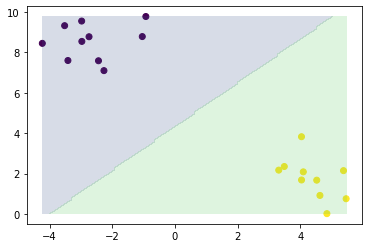

In [8]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = make_blobs(n_samples=20, centers=2, n_features=2, random_state=42)
# adding an outlier

y_outlier = 0

X2 = np.vstack((outlier, X))
y2 = np.append( y_outlier, y)

my_regression= LogisticRegression()

my_regression.fit(X, y)

x1_min = np.min(X[:,0])
x1_max = np.max(X[:,0])
x2_min = np.min(X[:,1])
x2_max = np.max(X[:,1])

xx1, xx2 = np.meshgrid(np.linspace(x1_min,x1_max, 100), np.linspace(x2_min,x2_max, 100), sparse=False, indexing='ij')
Xprediction = np.vstack((xx1.flatten(), xx2.flatten()))

targets_prediction = my_regression.predict(Xprediction.T)

plt.scatter(X[:,0], X[:,1], c= y)
plt.contourf(xx1,xx2, np.reshape(targets_prediction>0.5, np.shape(xx1)), levels=1, alpha=.2)
plt.show()

NameError: name 'axes' is not defined

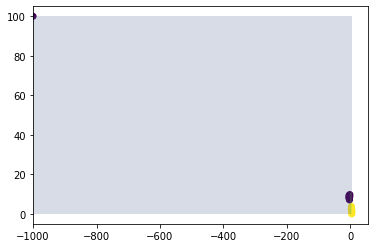

In [12]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = make_blobs(n_samples=20, centers=2, n_features=2, random_state=42)
# adding an outlier
outlier = np.array([-1000,100])
y_outlier = 0

X2 = np.vstack((outlier, X))
y2 = np.append( y_outlier, y)

my_regression= LogisticRegression()

my_regression.fit(X2, y2)

x1_min = np.min(X2[:,0])
x1_max = np.max(X2[:,0])
x2_min = np.min(X2[:,1])
x2_max = np.max(X2[:,1])

xx1, xx2 = np.meshgrid(np.linspace(x1_min,x1_max, 100), np.linspace(x2_min,x2_max, 100), sparse=False, indexing='ij')
Xprediction = np.vstack((xx1.flatten(), xx2.flatten()))

targets_prediction = my_regression.predict(Xprediction.T)

plt.scatter(X2[:,0], X2[:,1], c= y2)
plt.contourf(xx1,xx2, np.reshape(targets_prediction>0.5, np.shape(xx1)), levels=1, alpha=.2)
axes.set_xlim([x1_min, x1_max])
plt.show()